### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [90]:
import pandas as pd
dados = pd.read_csv('diabetes.csv')

In [91]:
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [92]:
x = dados.drop('diabetes', axis =1)
y = dados ['diabetes']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x, x_teste, y, y_teste = train_test_split(x, y, stratify = y, test_size = 0.05, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

#### Árvore de Decisão

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
modelo = DecisionTreeClassifier(max_depth =3)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de teste: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.7571428571428571
Acurácia de teste: 0.776595744680851


#### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
modelo_r = RandomForestClassifier(max_depth = 2)
                               
modelo_r.fit(x_treino, y_treino)
modelo_r.score(x, y)
print(f'Acurácia de treino: {modelo_r.score(x_treino, y_treino)}')
print(f'Acurácia de teste: {modelo_r.score(x_val, y_val)}')

Acurácia de treino: 0.7321428571428571
Acurácia de teste: 0.7127659574468085


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay 

#### Árvore de Decisão

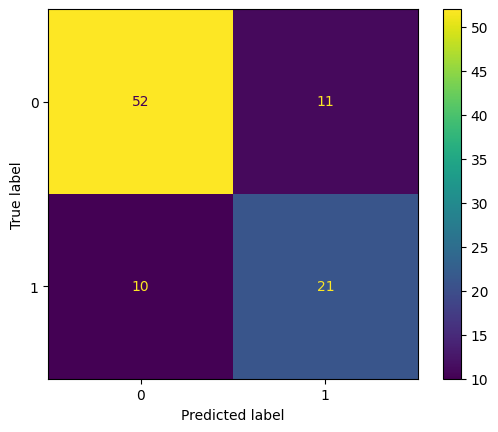

In [100]:
previsao_arvore = modelo.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_arvore);

#### Random Forest

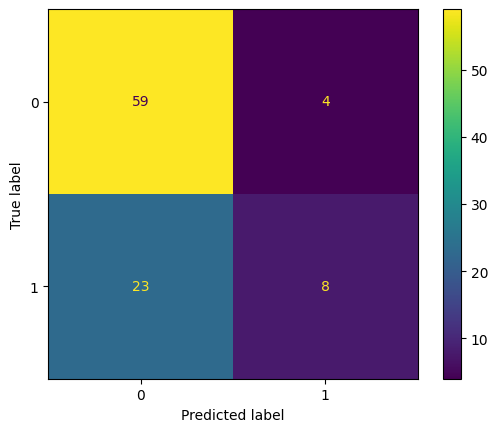

In [101]:
previsao_arvore = modelo_r.predict(x_val)
ConfusionMatrixDisplay.from_predictions(y_val, previsao_arvore);

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


In [103]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')
print(f'F1-score: {f1_score(y_val, y_previsto)}')

Acurácia: 0.776595744680851
Precisão: 0.65625
Recall: 0.6774193548387096
F1-score: 0.6666666666666666


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [104]:
from sklearn.metrics import RocCurveDisplay,roc_auc_score


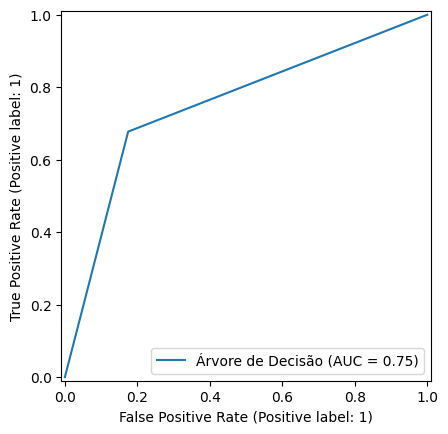

In [105]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [106]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.7514080901177674


### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [107]:
from sklearn.metrics import PrecisionRecallDisplay,average_precision_score


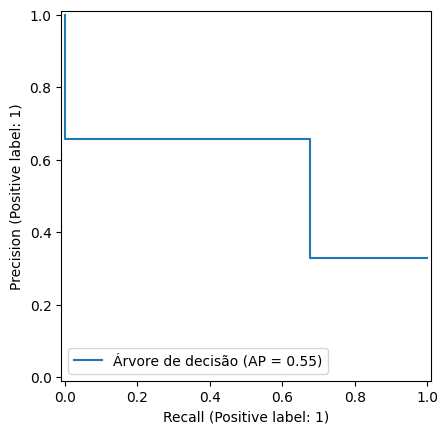

In [108]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [109]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.5509394303363074


### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [110]:
from sklearn.metrics import classification_report

In [111]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [112]:
def intervalo_conf(resultados, nome_modelo):
    media = resultados.mean()
    desvio_padrao = resultados.std()
    print(f'Intervalo de confiança ({nome_modelo}): [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [113]:
from sklearn.model_selection import cross_val_score, KFold

In [114]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

kf = KFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = kf)
resultado_rf = cross_val_score(random_forest, x, y, cv = kf)

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest')

Intervalo de confiança (Decision Tree): [0.5337181765177326, 0.8684155361422958]
Intervalo de confiança (Random Forest): [0.6075628294148364, 0.7713845390062161]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [115]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [116]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)

resultado_arvore = cross_val_score(arvore, x, y, cv = skf, scoring = 'f1')
resultado_rf = cross_val_score(random_forest, x, y, cv = skf, scoring =  'f1')

intervalo_conf(resultado_arvore, 'Decision Tree')
intervalo_conf(resultado_rf, 'Random Forest') 

Intervalo de confiança (Decision Tree): [0.2681981750463088, 0.7354166140441551]
Intervalo de confiança (Random Forest): [0.13317367824576778, 0.5269302580655989]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [117]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [118]:
arvore = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)

loo = LeaveOneOut()

resultado_arvore = cross_val_score(arvore, x, y, cv = loo)
resultado_rf = cross_val_score(random_forest, x, y, cv = loo)

print(f'Acurácia média (Decision Tree): {resultado_arvore.mean()}')
print(f'Acurácia média (Random Forest):{resultado_rf.mean()}') 

Acurácia média (Decision Tree): 0.7085561497326203
Acurácia média (Random Forest):0.6925133689839572


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

In [119]:
dados['diabetes'].value_counts()

diabetes
0    264
1    130
Name: count, dtype: int64

In [120]:
from matplotlib import pyplot as plt

In [121]:
dados['diabetes'].value_counts(normalize=True)

diabetes
0    0.670051
1    0.329949
Name: proportion, dtype: float64

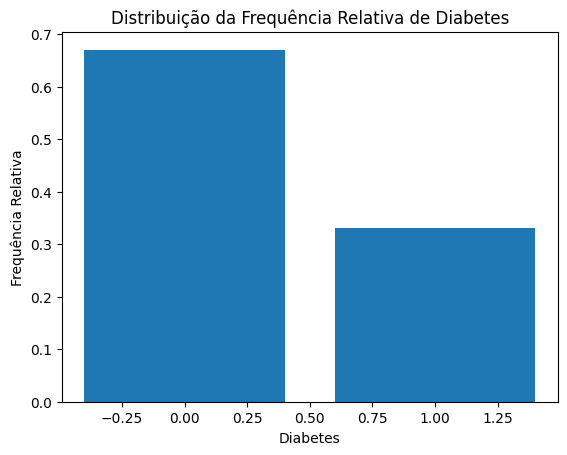

In [122]:
frequencia_relativa = dados['diabetes'].value_counts(normalize=True)

# Criar o gráfico de barras
plt.bar(frequencia_relativa.index, frequencia_relativa)
plt.xlabel('Diabetes')
plt.ylabel('Frequência Relativa')
plt.title('Distribuição da Frequência Relativa de Diabetes')
plt.show()

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [136]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

In [137]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', arvore)])

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')

print(f'F1 (Decision Tree):{resultado_arvore.mean()}')

F1 (Decision Tree):0.5486678988652672


In [138]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('oversample', SMOTE()), ('random_forest', random_forest)])

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')

print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.6284646204140086


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [139]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

In [140]:
arvore = DecisionTreeClassifier(max_depth = 3)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_arvore = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Decision Tree):{resultado_arvore.mean()}') 

F1 (Decision Tree):0.5460263484053807


In [141]:
random_forest = RandomForestClassifier(max_depth = 2)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('random_forest', random_forest)])
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 5)
resultado_rf = cross_val_score(pipeline, x, y, cv = skf, scoring = 'f1')
print(f'F1 (Random Forest):{resultado_rf.mean()}')

F1 (Random Forest):0.5974605635017153


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.50      0.71      0.59         7

    accuracy                           0.65        20
   macro avg       0.65      0.66      0.64        20
weighted avg       0.70      0.65      0.66        20



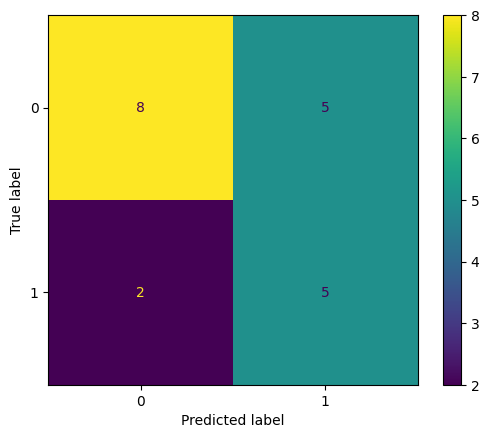

In [142]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = RandomForestClassifier(max_depth = 2)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

Resultados:

O modelo tem uma acurácia de 65%, o que significa que 65% das predições estavam corretas.

A precisão é alta para a classe 0 (0.80), mas baixa para a classe 1 (0.50), indicando que o modelo tem mais dificuldade em prever corretamente a classe 1.

O recall é maior para a classe 1 (0.71) do que para a classe 0 (0.62), sugerindo que o modelo é relativamente bom em identificar a maioria dos casos da classe 1.

Os F1-scores mostram que o desempenho do modelo é razoável para ambas as classes, com um desempenho um pouco melhor para a classe 0.